# FitBit Info Tracker

Rachel Huh

DS 4003 Data Design ||: Interactive Apps

Description of data:
* Data was generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level, hourly-level, and daily-level output for physical activity, heart rate, and sleep monitoring.The data started in multiple csv files, and was merged into one for this project. For the sake of this project, I will be using the calorie, steps, weight, and sleep logs because those give a holistic view of the users overall health status which is the purpose of the visualizations that will come into play. 

URL to dataset:
* https://www.kaggle.com/datasets/arashnic/fitbit/data

What the original purpose of the data was:
* Research on human temporal routine behavioral analysis and pattern recognition

## Importing data

In [16]:
#import dependencies
import pandas as pd
import seaborn as sns
import plotly.express as px
import csv
import numpy as np


In [17]:
#import step count by minute
# define file path
filepath = r"C:\Users\rache\OneDrive\Desktop\UVA 23-24\Spring\Design\Fitabase Data 4.12.16-5.12.16\data\original data\dailySteps_merged.csv";
  
# read the CSV file
steps = pd.read_csv(filepath)
  
# print the first five rows
print(steps.head())

           Id ActivityDay  StepTotal
0  1503960366   4/12/2016      13162
1  1503960366   4/13/2016      10735
2  1503960366   4/14/2016      10460
3  1503960366   4/15/2016       9762
4  1503960366   4/16/2016      12669


In [18]:
#import daily calorie count
filepath = r"C:\Users\rache\OneDrive\Desktop\UVA 23-24\Spring\Design\Fitabase Data 4.12.16-5.12.16\data\original data\dailyCalories_merged.csv";
  
# read the CSV file
daily_calories = pd.read_csv(filepath)
  
# print the first five rows
print(daily_calories.head())

           Id ActivityDay  Calories
0  1503960366   4/12/2016      1985
1  1503960366   4/13/2016      1797
2  1503960366   4/14/2016      1776
3  1503960366   4/15/2016      1745
4  1503960366   4/16/2016      1863


In [19]:
#import weight log
filepath = r"C:\Users\rache\OneDrive\Desktop\UVA 23-24\Spring\Design\Fitabase Data 4.12.16-5.12.16\data\original data\weightLogInfo_merged.csv";
  
# read the CSV file
weight_log = pd.read_csv(filepath)
  
# print the first five rows
print(weight_log.head())

           Id                   Date    WeightKg  WeightPounds   Fat  \
0  1503960366   5/2/2016 11:59:59 PM   52.599998    115.963147  22.0   
1  1503960366   5/3/2016 11:59:59 PM   52.599998    115.963147   NaN   
2  1927972279   4/13/2016 1:08:52 AM  133.500000    294.317120   NaN   
3  2873212765  4/21/2016 11:59:59 PM   56.700001    125.002104   NaN   
4  2873212765  5/12/2016 11:59:59 PM   57.299999    126.324875   NaN   

         BMI  IsManualReport          LogId  
0  22.650000            True  1462233599000  
1  22.650000            True  1462319999000  
2  47.540001           False  1460509732000  
3  21.450001            True  1461283199000  
4  21.690001            True  1463097599000  


In [20]:
#import sleep log
filepath = r"C:\Users\rache\OneDrive\Desktop\UVA 23-24\Spring\Design\Fitabase Data 4.12.16-5.12.16\data\original data\sleepDay_merged.csv";
  
# read the CSV file
sleep_log= pd.read_csv(filepath)
  
# print the first five rows
print(sleep_log.head())

           Id               SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0  1503960366  4/12/2016 12:00:00 AM                  1                 327   
1  1503960366  4/13/2016 12:00:00 AM                  2                 384   
2  1503960366  4/15/2016 12:00:00 AM                  1                 412   
3  1503960366  4/16/2016 12:00:00 AM                  2                 340   
4  1503960366  4/17/2016 12:00:00 AM                  1                 700   

   TotalTimeInBed  
0             346  
1             407  
2             442  
3             367  
4             712  


## Data Cleaning

In [21]:
#Summary of steps dataframe
summary1 = steps.describe()
print(summary1)

column_types1 = steps.dtypes
print(column_types1)

                 Id     StepTotal
count  9.400000e+02    940.000000
mean   4.855407e+09   7637.910638
std    2.424805e+09   5087.150742
min    1.503960e+09      0.000000
25%    2.320127e+09   3789.750000
50%    4.445115e+09   7405.500000
75%    6.962181e+09  10727.000000
max    8.877689e+09  36019.000000
Id              int64
ActivityDay    object
StepTotal       int64
dtype: object


In [22]:
#Summary of daily calories dataframe
summary2 = daily_calories.describe()
print(summary2)

column_types2 = daily_calories.dtypes
print(column_types2)

                 Id     Calories
count  9.400000e+02   940.000000
mean   4.855407e+09  2303.609574
std    2.424805e+09   718.166862
min    1.503960e+09     0.000000
25%    2.320127e+09  1828.500000
50%    4.445115e+09  2134.000000
75%    6.962181e+09  2793.250000
max    8.877689e+09  4900.000000
Id              int64
ActivityDay    object
Calories        int64
dtype: object


In [23]:
#Summary of weight log dataframe
summary3 = weight_log.describe()
print(summary3)

column_types3 = weight_log.dtypes
print(column_types3)


                 Id    WeightKg  WeightPounds       Fat        BMI  \
count  6.700000e+01   67.000000     67.000000   2.00000  67.000000   
mean   7.009282e+09   72.035821    158.811801  23.50000  25.185224   
std    1.950322e+09   13.923206     30.695415   2.12132   3.066963   
min    1.503960e+09   52.599998    115.963147  22.00000  21.450001   
25%    6.962181e+09   61.400002    135.363832  22.75000  23.959999   
50%    6.962181e+09   62.500000    137.788914  23.50000  24.389999   
75%    8.877689e+09   85.049999    187.503152  24.25000  25.559999   
max    8.877689e+09  133.500000    294.317120  25.00000  47.540001   

              LogId  
count  6.700000e+01  
mean   1.461772e+12  
std    7.829948e+08  
min    1.460444e+12  
25%    1.461079e+12  
50%    1.461802e+12  
75%    1.462375e+12  
max    1.463098e+12  
Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
Fat               float64
BMI               float64
IsManualReport 

No crazy outliers were noticed. 

#### Clean the weight_log df to get rid of Nans

In [24]:
#Print the number of missing values in the weight log dataframe
num_nas = weight_log.isna().sum().sum()
print("Number of missing values (NaNs) in the DataFrame:", num_nas)

#Print the columns with missing values
columns_with_nas = weight_log.columns[weight_log.isna().any()].tolist()
print("Columns with NaN values:", columns_with_nas)

#Print the rows with NaN values
rows_with_nas = weight_log[weight_log.isna().any(axis=1)]
print("Rows with NaN values:")
print(rows_with_nas)

#Drop the rows where the ID is NA
weight_log.dropna(subset=['Id'], inplace=True)

# Count the number of NaN values in the 'Fat' column
num_na_fat = weight_log['Fat'].isna().sum()
print("Number of NaN values in 'Fat' column:", num_na_fat)

# Drop the 'Fat' column
weight_log.drop('Fat', axis=1, inplace=True)

#Print the columns with missing values
columns_with_nas1 = weight_log.columns[weight_log.isna().any()].tolist()
print("Columns with NaN values after getting rid of fat:", columns_with_nas1)


Number of missing values (NaNs) in the DataFrame: 65
Columns with NaN values: ['Fat']
Rows with NaN values:
            Id                   Date    WeightKg  WeightPounds  Fat  \
1   1503960366   5/3/2016 11:59:59 PM   52.599998    115.963147  NaN   
2   1927972279   4/13/2016 1:08:52 AM  133.500000    294.317120  NaN   
3   2873212765  4/21/2016 11:59:59 PM   56.700001    125.002104  NaN   
4   2873212765  5/12/2016 11:59:59 PM   57.299999    126.324875  NaN   
6   4319703577   5/4/2016 11:59:59 PM   72.300003    159.394222  NaN   
..         ...                    ...         ...           ...  ...   
62  8877689391    5/6/2016 6:43:35 AM   85.000000    187.392923  NaN   
63  8877689391    5/8/2016 7:35:53 AM   85.400002    188.274775  NaN   
64  8877689391    5/9/2016 6:39:44 AM   85.500000    188.495234  NaN   
65  8877689391   5/11/2016 6:51:47 AM   85.400002    188.274775  NaN   
66  8877689391   5/12/2016 6:42:53 AM   84.000000    185.188300  NaN   

          BMI  IsManualRepo

All of the Nans were in the 'fat' column. This column is not useful so I got rid of it. I'm now converting all float variables to int to make data visualization easier. 

In [25]:
#Before cleaning summary
column_types = weight_log.dtypes
print(column_types)

Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
BMI               float64
IsManualReport       bool
LogId               int64
dtype: object


In [26]:
#Convert float columns to int
weight_log['WeightKg'] = weight_log['WeightKg'].astype(int)
weight_log['WeightPounds'] = weight_log['WeightPounds'].astype(int)
weight_log['BMI'] = weight_log['BMI'].astype(int)

#After cleaning summary
column_types3 = weight_log.dtypes
print(column_types3)

Id                 int64
Date              object
WeightKg           int32
WeightPounds       int32
BMI                int32
IsManualReport      bool
LogId              int64
dtype: object


#### Clean the rest of the dataframes

In [27]:
#Check for missing values in the dataframes

#Print the number of missing values in the steps dataframe
num_nas_steps = steps.isna().sum().sum()
print("Number of missing values (NaNs) in the DataFrame:", num_nas_steps)

#Print the number of missing values in the daily calories dataframe
num_nas_cal =  daily_calories.isna().sum().sum()
print("Number of missing values (NaNs) in the DataFrame:", num_nas_cal)

#Print the number of missing values in the sleep log dataframe
num_nas_sleep = sleep_log.isna().sum().sum()
print("Number of missing values (NaNs) in the DataFrame:", num_nas_sleep)

Number of missing values (NaNs) in the DataFrame: 0
Number of missing values (NaNs) in the DataFrame: 0
Number of missing values (NaNs) in the DataFrame: 0


In [28]:
#Check for any variable types that are out of the ordinary

#Summary of steps dataframe
column_types = steps.dtypes
print(column_types)

#Summary of daily calories dataframe
column_types1 = daily_calories.dtypes
print(column_types1)

#Summary of sleep log dataframe
column_type4 = sleep_log.dtypes
print(column_type4)

#None were out of the ordinary!

Id              int64
ActivityDay    object
StepTotal       int64
dtype: object
Id              int64
ActivityDay    object
Calories        int64
dtype: object
Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object


The other dataframes were already clean and ready to go!

### Combined different datasets into one for ease

#### Convert all date columns to date time format with just the date in order to merge them together

In [29]:
# Convert 'Date' column to datetime format 
steps['ActivityDay'] = pd.to_datetime(steps['ActivityDay'])
daily_calories['ActivityDay'] = pd.to_datetime(daily_calories['ActivityDay'])
# Convert 'Date' column to datetime format with explicit format specification
weight_log['Date'] = pd.to_datetime(weight_log['Date'], format='%m/%d/%Y %I:%M:%S %p')
# Convert 'Date' column to datetime format with explicit format specification
sleep_log['SleepDay'] = pd.to_datetime(sleep_log['SleepDay'], format='%m/%d/%Y %I:%M:%S %p')

In [30]:
is_datetime = pd.api.types.is_datetime64_any_dtype(weight_log['Date'])

if is_datetime:
    print("The 'Date' column is in datetime format.")
else:
    print("The 'Date' column is not in datetime format.")

The 'Date' column is in datetime format.


In [31]:
# Extract only the date part from weight_log and sleep_log
weight_log['Date'] = weight_log['Date'].dt.floor('D')
sleep_log['SleepDay'] = sleep_log['SleepDay'].dt.floor('D')

In [32]:
# Rename the 'ActivityDay' and 'SleepDay' columns to 'Date'
steps.rename(columns={'ActivityDay': 'Date'}, inplace=True)
daily_calories.rename(columns={'ActivityDay': 'Date'}, inplace=True)
sleep_log.rename(columns={'SleepDay': 'Date'}, inplace=True)

In [33]:
#Check that the conversion to date time actually worked
is_datetime = pd.api.types.is_datetime64_any_dtype(weight_log['Date'])

if is_datetime:
    print("The 'Date' column is in datetime format.")
else:
    print("The 'Date' column is not in datetime format.")

The 'Date' column is in datetime format.


In [34]:
#Merge the datasets together based on Id and Date

# Merge steps and daily_calories DataFrames on 'Id' and 'Date'
df = pd.merge(steps, daily_calories, on=['Id', 'Date'], how='outer')

# Merge weight_log DataFrame with the merged_df on 'Id' and 'Date'
df = pd.merge(df, weight_log, on=['Id', 'Date'], how='outer')

# Merge sleep_log DataFrame with the merged_df on 'Id' and 'Date'
df = pd.merge(df, sleep_log, on=['Id', 'Date'], how='outer')


In [35]:
#check the merged data frame
df.head()

,Id,Date,StepTotal,Calories,WeightKg,WeightPounds,BMI,IsManualReport,LogId,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,1985,NaN,NaN,NaN,NaN,NaN,1.0,327.0,346.0
1,1503960366,2016-04-13,10735,1797,NaN,NaN,NaN,NaN,NaN,2.0,384.0,407.0
2,1503960366,2016-04-14,10460,1776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,1745,NaN,NaN,NaN,NaN,NaN,1.0,412.0,442.0
4,1503960366,2016-04-16,12669,1863,NaN,NaN,NaN,NaN,NaN,2.0,340.0,367.0


There are much less data points in the weight variables and sleep log variables which is okay. We will only be showing the points on the visualization that are filled in! 

##### Remove columns I won't need for graphs

In [36]:
# Remove specified columns
columns_to_remove = ['IsManualReport', 'LogId', 'TotalSleepRecords']
df = df.drop(columns=columns_to_remove)

print("DataFrame after removing specified columns:")
print(df)

DataFrame after removing specified columns:
             Id       Date  StepTotal  Calories  WeightKg  WeightPounds   BMI  \
0    1503960366 2016-04-12      13162      1985       NaN           NaN   NaN   
1    1503960366 2016-04-13      10735      1797       NaN           NaN   NaN   
2    1503960366 2016-04-14      10460      1776       NaN           NaN   NaN   
3    1503960366 2016-04-15       9762      1745       NaN           NaN   NaN   
4    1503960366 2016-04-16      12669      1863       NaN           NaN   NaN   
..          ...        ...        ...       ...       ...           ...   ...   
938  8877689391 2016-05-08      10686      2847      85.0         188.0  25.0   
939  8877689391 2016-05-09      20226      3710      85.0         188.0  25.0   
940  8877689391 2016-05-10      10733      2832       NaN           NaN   NaN   
941  8877689391 2016-05-11      21420      3832      85.0         188.0  25.0   
942  8877689391 2016-05-12       8064      1849      84.0        

## Exploratory Analysis 

Before exploratory analysis, I made the new columns out of my existing columns that I'll need for my graphs.

### Distribution Exploration

In [37]:
# Compute statistics for each column
column_statistics = df.describe()

# Extract min, max, and mean values for each column
min_values = column_statistics.loc['min']
max_values = column_statistics.loc['max']
mean_values = column_statistics.loc['mean']

# Print the results
print("Minimum values:\n", min_values)
print("\nMaximum values:\n", max_values)
print("\nMean values:\n", mean_values)

Minimum values:
 Id                           1503960366.0
Date                  2016-04-12 00:00:00
StepTotal                             0.0
Calories                              0.0
WeightKg                             52.0
WeightPounds                        115.0
BMI                                  21.0
TotalMinutesAsleep                   58.0
TotalTimeInBed                       61.0
Name: min, dtype: object

Maximum values:
 Id                           8877689391.0
Date                  2016-05-12 00:00:00
StepTotal                         36019.0
Calories                           4900.0
WeightKg                            133.0
WeightPounds                        294.0
BMI                                  47.0
TotalMinutesAsleep                  796.0
TotalTimeInBed                      961.0
Name: max, dtype: object

Mean values:
 Id                                4858486292.581124
Date                  2016-04-26 07:21:18.897136896
StepTotal                               

### Make new columns for the sake of graph making

##### BMIBins

In [38]:
# Function to categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'Normal (18.5-24.9)'
    elif 25 <= bmi <= 29.9:
        return 'Overweight (25-29.9)'
    elif 30 <= bmi <= 34.9:
        return 'Obese'
    else:
        return 'Unknown'

# Apply the function to create the new column 'BMIBin'
df['BMIBin'] = df['BMI'].apply(categorize_bmi)

# Display the DataFrame
df.head()


,Id,Date,StepTotal,Calories,WeightKg,WeightPounds,BMI,TotalMinutesAsleep,TotalTimeInBed,BMIBin
0,1503960366,2016-04-12,13162,1985,NaN,NaN,NaN,327.0,346.0,Unknown
1,1503960366,2016-04-13,10735,1797,NaN,NaN,NaN,384.0,407.0,Unknown
2,1503960366,2016-04-14,10460,1776,NaN,NaN,NaN,NaN,NaN,Unknown
3,1503960366,2016-04-15,9762,1745,NaN,NaN,NaN,412.0,442.0,Unknown
4,1503960366,2016-04-16,12669,1863,NaN,NaN,NaN,340.0,367.0,Unknown


##### SleepEff (sleep effectivity) 

In [39]:
def sleep_eff(row):
    return row['TotalTimeInBed'] - row['TotalMinutesAsleep']

df['SleepEff'] = df.apply(sleep_eff, axis=1)

df.head()

,Id,Date,StepTotal,Calories,WeightKg,WeightPounds,BMI,TotalMinutesAsleep,TotalTimeInBed,BMIBin,SleepEff
0,1503960366,2016-04-12,13162,1985,NaN,NaN,NaN,327.0,346.0,Unknown,19.0
1,1503960366,2016-04-13,10735,1797,NaN,NaN,NaN,384.0,407.0,Unknown,23.0
2,1503960366,2016-04-14,10460,1776,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
3,1503960366,2016-04-15,9762,1745,NaN,NaN,NaN,412.0,442.0,Unknown,30.0
4,1503960366,2016-04-16,12669,1863,NaN,NaN,NaN,340.0,367.0,Unknown,27.0


##### StepBin

In [43]:
# Function to categorize Steps
def categorize_step(StepTotal):
    if StepTotal < 5000:
        return 'Low Step Count (<5,000)'
    elif 5000 <= StepTotal <= 9999:
        return 'Average Step Count (5,000-9,999)'
    elif 10000 <= StepTotal <= 50000:
        return 'High Step Count (>10,000)'
    else:
        return 'Unknown'

# Apply the function to create the new column 'StepBin'
df['StepBin'] = df['StepTotal'].apply(categorize_step)

# Display the DataFrame
df.head()

,Id,Date,StepTotal,Calories,WeightKg,WeightPounds,BMI,TotalMinutesAsleep,TotalTimeInBed,BMIBin,SleepEff,StepBin
0,1503960366,2016-04-12,13162,1985,NaN,NaN,NaN,327.0,346.0,Unknown,19.0,"High Step Count (>10,000)"
1,1503960366,2016-04-13,10735,1797,NaN,NaN,NaN,384.0,407.0,Unknown,23.0,"High Step Count (>10,000)"
2,1503960366,2016-04-14,10460,1776,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,"High Step Count (>10,000)"
3,1503960366,2016-04-15,9762,1745,NaN,NaN,NaN,412.0,442.0,Unknown,30.0,"Average Step Count (5,000-9,999)"
4,1503960366,2016-04-16,12669,1863,NaN,NaN,NaN,340.0,367.0,Unknown,27.0,"High Step Count (>10,000)"


In [45]:
#Export dataframe to csv

# Specify the file path
file_path = r'C:\Users\rache\OneDrive\Desktop\UVA 23-24\Spring\Design\Fitabase Data 4.12.16-5.12.16\data\fitbitdata.csv'

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)  # Set index=False to exclude index from the CSV

print("DataFrame has been saved to:", file_path)

DataFrame has been saved to: C:\Users\rache\OneDrive\Desktop\UVA 23-24\Spring\Design\Fitabase Data 4.12.16-5.12.16\data\fitbitdata.csv


In [46]:
#Export dataframe to csv

# Specify the file path
file_path = r'C:\Users\rache\OneDrive\Desktop\UVA 23-24\Spring\Design\Fitabase Data 4.12.16-5.12.16\fitbitdata.csv'

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)  # Set index=False to exclude index from the CSV

print("DataFrame has been saved to:", file_path)

DataFrame has been saved to: C:\Users\rache\OneDrive\Desktop\UVA 23-24\Spring\Design\Fitabase Data 4.12.16-5.12.16\fitbitdata.csv


To continue the exploratory analysis, I will now look into the variables within the combined dataset

##### Number of total observations

In [41]:
# Count non-null observations for each variable
obs_counts = df.count()

print("Number of observations for each variable:")
print(obs_counts)

Number of observations for each variable:
Id                    943
Date                  943
StepTotal             943
Calories              943
WeightKg               67
WeightPounds           67
BMI                    67
TotalMinutesAsleep    413
TotalTimeInBed        413
BMIBin                943
SleepEff              413
dtype: int64


##### Missing data per variable

In [28]:
# Count missing values for each variable
missing_counts = df.isna().sum()

print("Number of missing values for each variable:")
print(missing_counts)

Number of missing values for each variable:
Id                      0
Date                    0
StepTotal               0
Calories                0
WeightKg              876
WeightPounds          876
BMI                   876
TotalMinutesAsleep    530
TotalTimeInBed        530
BMIBin                  0
SleepEff              530
StepBin                 0
dtype: int64


It is okay to not have all weight or sleep records because I will just graph the portions of data that I do have. 

##### Distribution of continuous variables

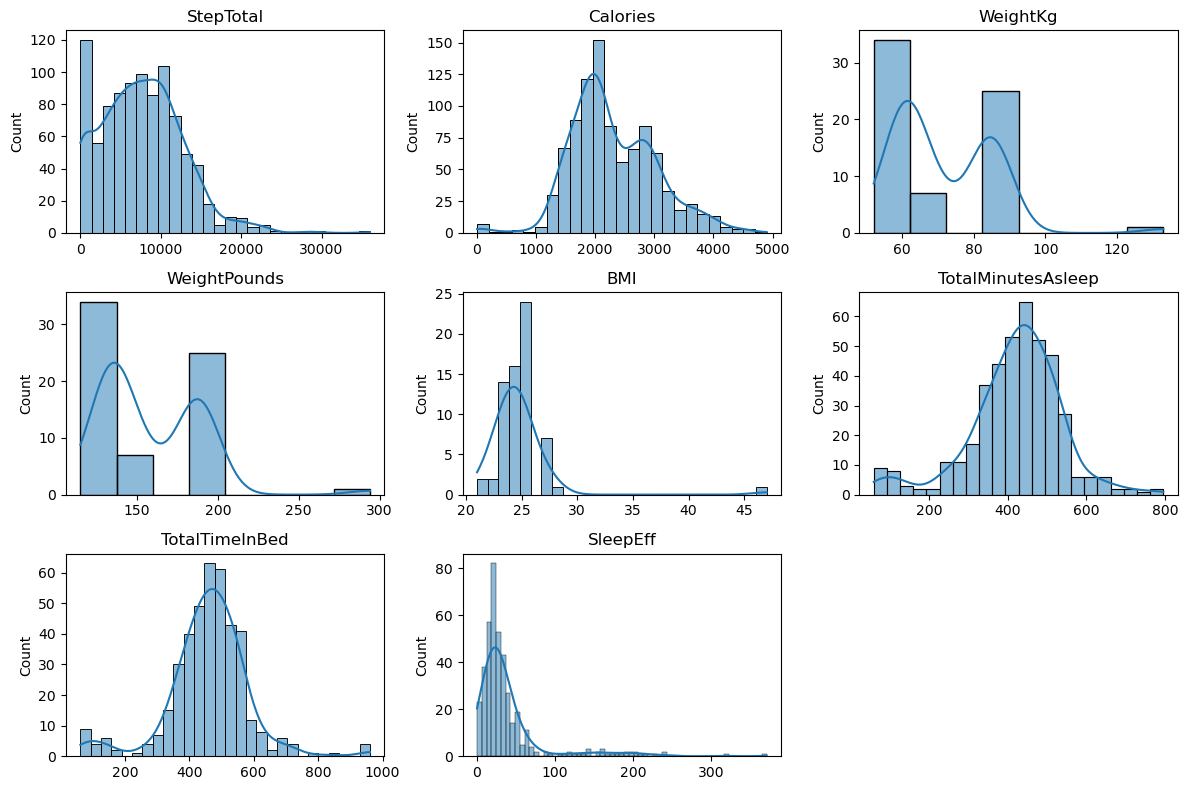

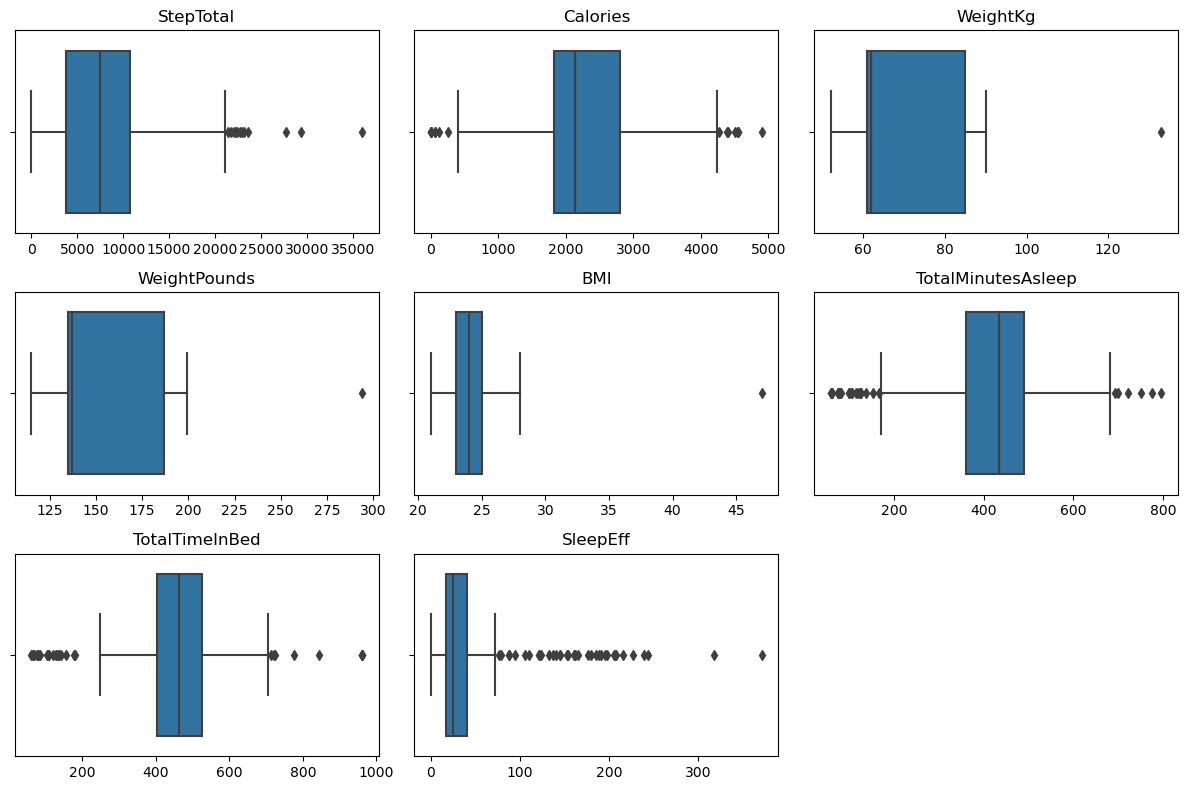

In [29]:
import matplotlib.pyplot as plt
# Histograms for continuous variables
continuous_vars = ["StepTotal", "Calories", "WeightKg", "WeightPounds", "BMI", "TotalMinutesAsleep", "TotalTimeInBed", "SleepEff"]
plt.figure(figsize=(12, 8))
for var in continuous_vars:
    plt.subplot(3, 3, continuous_vars.index(var) + 1)
    sns.histplot(df[var], kde=True)
    plt.title(var)
    plt.xlabel('')
plt.tight_layout()
plt.show()

# Boxplots to identify outliers
plt.figure(figsize=(12, 8))
for var in continuous_vars:
    plt.subplot(3, 3, continuous_vars.index(var) + 1)
    sns.boxplot(x=df[var])
    plt.title(var)
    plt.xlabel('')
plt.tight_layout()
plt.show()

The outliers are okay because they are still possible values within the context of these variables.

##### Number of unique categories for categorical variables

In [36]:
# Count unique categories for each categorical variable
unique_counts = df[['Id', 'BMIBin', 'StepBin']].nunique()

print("Number of unique categories for each categorical variable:")
print(unique_counts)

Number of unique categories for each categorical variable:
Id         33
BMIBin      3
StepBin     3
dtype: int64


# Data Dictionary for Dataframe 'df'

#### Variables:
Common to all:
* Id (int) - User id
* Date (date-time) - Day that the data was tracked (no time)

Step Count Variables: Gives the user's number of steps per day on specific days spanning from 4/12/2016 to 5/12/2016
* Number of data points: 940
* StepTotal (int) - total steps for that day

Calories Count Variables: Gives the user's number of calories expended on specific days spanning from 4/12/2016 to 5/12/2016
* Number of data points: 940
* Calories (int) - number of calories expended that day

Weight Log Variables: Gives the users' weight in kg and pounds, and their BMI on specific days spanning from 4/12/2016 to 5/12/2016
* Number of data points: 67
* WeightKg (int) - weight that day in kg
* WeightPounds (int) - weight that day in pounds
* BMI (int) - bmi that day
* LogId (int) - extra id of user
* IsManualReport (boolean) - tracks whether the data was reported manually or not

Sleep Log Variables: Tracks the users' sleep behavior on specific days spanning from 4/12/2016 to 5/12/2016
* Number of data points: 413
* TotalSleepRecords (int) - number of records of sleep that user has 
* TotalMinutesAsleep (int) - number of minutes the user slept that day
* TotalTimeInBed (int) - total time in bed the user was that day

# UI brainstorming list + Data Visualization

* Step count line graph of date vs. step count that you can adjust the time frame for by week, month, or 3 day spans for individual users
    * UI: Drop down menu or radio buttons
* Have overlapping lines of multiple users with a line graph competing to get more steps in over the span of a week of date vs. step count
    *  UI: Drop down menu or radio buttons
* Bar graph of date vs. time in bed showing time in bed from the past week, month, or 3 day spans for individual users
    *  UI: Drop down menu or radio buttons
* Line graph of step count vs. calorie count comparing the step count to calorie count to show if there are trends
    * UI: Slider from both sides of a timeline to choose the period of time they want to look at
    * UI: Tool tips
* Weight log would be more notebook style that you can scroll through and change the period of time through a drop down into calendar
    * UI: Progress bar that shows the progress each day in comparison to the goal they set
    * UI: Input textbox to enter goal